In [1]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 60
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams['font.size'] = 20
plt.rcParams["figure.autolayout"] = True

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng
%matplotlib inline

# Stage 1: 篩選行為

## Notes
### 現在 Stage 1 ouput 的欄位
'ShopMemberId', 'Behavior', 'Tunnel', 'Device', 'PageType', 'UnitPrice', 'Qty', 'TotalSalesAmount', 'UTMSource', 'HitTime', 'EventTime'

In [2]:
df_list = []
month = [3, 4, 5, 6, 7, 8]
# month = [4]
for m in month:
    df_tmp = pd.read_csv(f'./data/BehaviorData_2022-0{m}-01.csv')
    # df_list.append(df_tmp)
    df_list.append(df_tmp[['ShopMemberId', 'Behavior', 'Tunnel', 'Device', 'PageType', 'UnitPrice', 'Qty', 'TotalSalesAmount', 'UTMSource', 'HitTime', 'EventTime']])

df_all = pd.concat(df_list, ignore_index=True)

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (13,14,15,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_all.dropna(inplace=True, subset=['ShopMemberId', 'Behavior'])

In [4]:
df_all

,ShopMemberId,Behavior,Tunnel,Device,PageType,UnitPrice,Qty,TotalSalesAmount,UTMSource,HitTime,EventTime
0,lA8oiBTAoQyAVEhBiRUNk74tBoPFGlMZJAybGjD8QtY=,add,Web,MobileWeb,NaN,950.0,1.0,NaN,FB_CA,1.647056e+12,1.647058e+12
1,u2xwu6m7RJ0TWbONOYnaNf+en74KJkN3Z1ur3J51Fzw=,add,Web,MobileWeb,NaN,3900.0,NaN,NaN,affiliate,1.647276e+12,1.647276e+12
4,jwWVWrbFBUjl0MCzqvGhtD4gkN7YyxldUUZhtvVDh3Q=,add,Web,Desktop,NaN,1440.0,NaN,NaN,hiddenlink,1.648524e+12,1.648526e+12
5,COeFF6e5xHPkK7aJ/81ZrMhsMCiLh0CI/qpVD2SJDmE=,add,Web,Desktop,NaN,3600.0,NaN,NaN,(direct),1.648611e+12,1.648611e+12
6,QtnlqGkdpKJFpVOxnUtEAkKlig9luiWSWoZyDhqJLuQ=,add,Web,MobileWeb,NaN,750.0,NaN,NaN,coupon,1.648270e+12,1.648270e+12
...,...,...,...,...,...,...,...,...,...,...,...
18484115,CnfZ1Uyu1NA8EH7mnP7ktQK5dSuWdBBzbODYjNzUFWw=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,google,1.661439e+12,1.661440e+12
18484116,G7m+w5eVXaNwjZwftVGrY71yOWvKJBAizOfw/jSPArI=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,(direct),1.661789e+12,1.661789e+12
18484117,hCHQR0V3USttcZvdZM22vQVJ7q8VTREt04GWtEdvS8M=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,(direct),1.661820e+12,1.661820e+12
18484118,W6omL8yAqAIewhRjWUojtJ4WhRAxOLUCF3AsqF7eTYw=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,FB_CA,1.661570e+12,1.661570e+12


In [5]:
df_tag = pd.read_csv('./data/tag.csv')
df_tag = df_tag[df_tag.tag1 == 'A'][['ShopMemberId', '1to2']].reset_index(drop=True)
df_tag.rename(columns = {'1to2':'tag'}, inplace = True)
# df_tag.dropna(inplace=True)

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_tag

,ShopMemberId,tag
0,+1M+FFZHS9pJCA2w8BWC2rx61bJJXUNt4ZnpUz5BH/0=,AA
1,+264TCZ+nRcIcGI25eFdqkoxeWJLctuzBrpvBqY7bPo=,AP
2,+458PoYquuxvkXIfUgKUPg3REaA4dLoBrHqeM10djm8=,AA
3,+458PoYquuxvkXIfUgKUPg7HG5qv58R7Yi1lE1Xgbcw=,AL
4,+458PoYquuxvkXIfUgKUPghuUkC70xOWoFPhzGoFo+o=,AP
...,...,...
19597,zr/JPzIrZ8jl1IxfFVxJcychexUWHiKCNoqAlCcpehQ=,AP
19598,zr/JPzIrZ8jl1IxfFVxJcz/eEjQlsmiOKRH9bVHHBlQ=,AP
19599,zr/JPzIrZ8jl1IxfFVxJczLhx0hK1xiUCbnrNq+6nKc=,AA
19600,zr/JPzIrZ8jl1IxfFVxJczkkOo3YSFAPuBabMOTJQ/Q=,AP


# 1. 以行為資料表為標準，看每個族群總行為中特定行為的佔比
* 分母是 AA 所有動作，分子是該行為在 AA 所有動作出現的次數

In [7]:
df_filter_member = df_all[df_all.ShopMemberId.isin(df_tag.ShopMemberId)]
df_filter_member = df_filter_member.merge(df_tag, on='ShopMemberId', how='left')
display(df_filter_member)

,ShopMemberId,Behavior,Tunnel,Device,PageType,UnitPrice,Qty,TotalSalesAmount,UTMSource,HitTime,EventTime,tag
0,jwWVWrbFBUjl0MCzqvGhtD4gkN7YyxldUUZhtvVDh3Q=,add,Web,Desktop,NaN,1440.0,NaN,NaN,hiddenlink,1.648524e+12,1.648526e+12,AA
1,COeFF6e5xHPkK7aJ/81ZrMhsMCiLh0CI/qpVD2SJDmE=,add,Web,Desktop,NaN,3600.0,NaN,NaN,(direct),1.648611e+12,1.648611e+12,AA
2,gIsgcic0IW0Iy5wA9qTRBTUgJPXCG98R9MkEkAhdb5I=,add,Web,MobileWeb,NaN,1700.0,1.0,NaN,affiliate,1.647772e+12,1.647774e+12,AP
3,pDIP9rsN887S03R/ZAMNQWKYnKMxn/FU0FwE+0XNsqk=,add,Web,MobileWeb,NaN,4000.0,NaN,NaN,FB_CA,1.647219e+12,1.647219e+12,AP
4,yRX+te+f7ZR6EDZHYbG7b1CDPvd1aOTwhafCjdsKEU0=,add,Web,MobileWeb,NaN,550.0,NaN,NaN,FB_CA,1.647213e+12,1.647214e+12,AA
...,...,...,...,...,...,...,...,...,...,...,...,...
4482785,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661261e+12,1.661262e+12,AA
4482786,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,FB_CA,1.661255e+12,1.661256e+12,AA
4482787,pehSI78K0X7CIGKGIkULBKuDnVPlML+OEjcrQN70t/I=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661773e+12,1.661773e+12,AL
4482788,CMUcNcCnQR0Ef1sblo72oQHyd3GQHVvwgYuIR8O8AVE=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,(direct),1.661440e+12,1.661441e+12,AA


In [8]:
df_filter_member['tag'].value_counts()

AP    2212886
AA    2099244
AL     170660
Name: tag, dtype: int64

In [9]:
df_AA = df_filter_member[df_filter_member.tag.isin(['AA'])]
df_AP = df_filter_member[df_filter_member.tag.isin(['AP'])]
df_AL = df_filter_member[df_filter_member.tag.isin(['AL'])]

,behavior,counts
0,selectcontent,0.264313
1,viewproduct,0.255300
2,viewcategory,0.221391
3,viewmainpage,0.175227
4,add,0.024796
5,viewpromotiondetail,0.021449
6,viewecoupondetail,0.012364
7,checkout,0.008745
8,viewcustompage,0.006333
9,search,0.005154


,behavior,counts
0,selectcontent,0.269368
1,viewproduct,0.244939
2,viewcategory,0.214761
3,viewmainpage,0.190206
4,add,0.022014
5,viewpromotiondetail,0.020611
6,viewecoupondetail,0.015626
7,checkout,0.007173
8,viewcustompage,0.006072
9,search,0.004876


,behavior,counts
0,selectcontent,0.289318
1,viewmainpage,0.227388
2,viewcategory,0.209545
3,viewproduct,0.209381
4,viewpromotiondetail,0.015505
5,add,0.015469
6,viewecoupondetail,0.013946
7,viewcustompage,0.006141
8,checkout,0.006053
9,search,0.004072


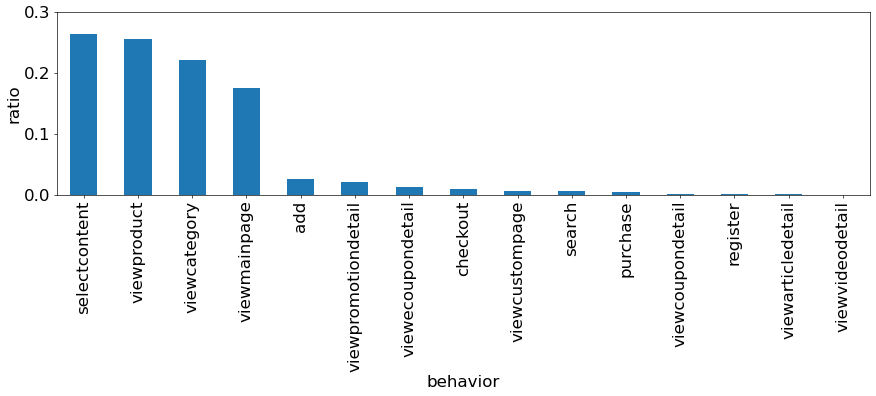

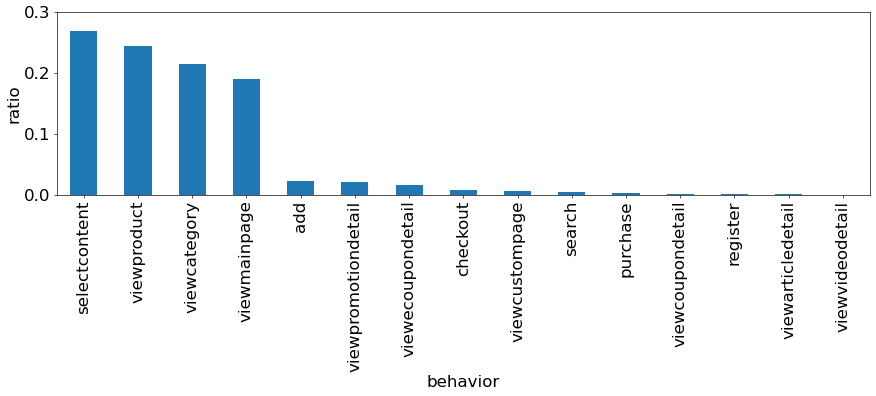

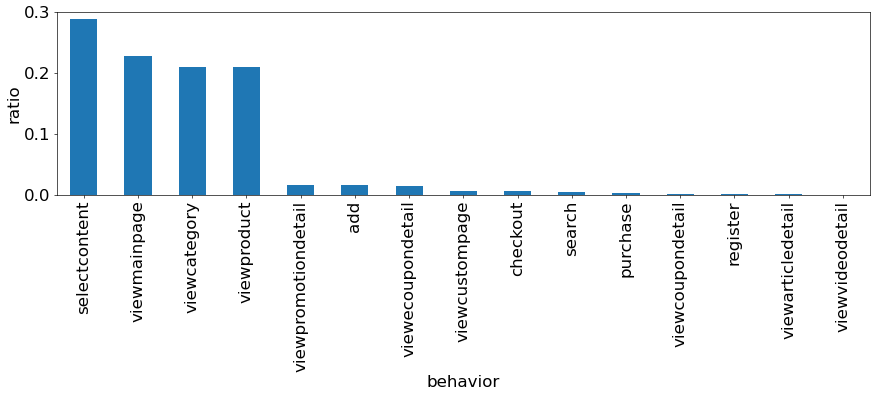

In [10]:
tags = ['AA', 'AP', 'AL']

for tag in tags:
    df_gp = globals()[f"df_{tag}"].Behavior.value_counts().rename_axis('behavior').reset_index(name='counts')
    df_gp['counts'] = df_gp['counts'] / sum(df_gp['counts'])
    display(df_gp)
    field = "behavior"
    ax = df_gp.set_index(field).plot(kind="bar", legend=False)
    ax.set_ylabel("ratio")
    ax.set_ylim([0, 0.3])

## 每個行為與四群的卡方檢定

$H_0$: The two variables are independent.  
$H_1$: The two variables are dependent.

In [11]:
behaviors = ['viewproduct', 'selectcontent', 'viewcategory', 'viewmainpage', 'add', 'viewpromotiondetail', 'viewecoupondetail', 'checkout', 'search', 'viewcustompage', 'register', 'purchase', 'viewcoupondetail', 'viewarticledetail']
alpha = 0.05
filtered_behaviors_by_total_actions = []

In [12]:
for b in behaviors:
    print(f'======================= {b} =======================')
    df_filter_member[b] = df_filter_member['Behavior'].apply(lambda x: 1 if (x == b) else 0)
    # display(df_filter_member)
    # 列出Contingency Table
    cont1 = pd.crosstab(df_filter_member[b], df_filter_member['tag'])
    print("Contingency Table:")
    display(cont1)
    
    chi2, p, dof, ex = stats.chi2_contingency(cont1, correction=False)
    print("Chi-squared Statistics = %0.4f" % chi2)
    print("Degree of freedom = %0.4f" % dof)
    print("p-value = %0.4f" % p)
    print("Expected Frequency:")
    print(ex)

    if np.sum(ex < 5) > 0:
        print("Rule of five is not met. ")
    else:
        print("Rule of five is met. ")
    print('\n\n')
    
    if p < alpha:
        filtered_behaviors_by_total_actions.append(b)

======================= viewproduct =======================
Contingency Table:


tag,AA,AL,AP
viewproduct,,,
0,1563308,134927,1670865
1,535936,35733,542021


Chi-squared Statistics = 2068.7234
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[1577714.53947207  128261.77581372 1663123.68471421]
 [ 521529.46052793   42398.22418628  549762.31528579]]
Rule of five is met. 



======================= selectcontent =======================
Contingency Table:


tag,AA,AL,AP
selectcontent,,,
0,1544386,121285,1616806
1,554858,49375,596080


Chi-squared Statistics = 560.8975
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[1537149.88821426  124964.03463468 1620363.07715106]
 [ 562094.11178574   45695.96536532  592522.92284894]]
Rule of five is met. 



======================= viewcategory =======================
Contingency Table:


tag,AA,AL,AP
viewcategory,,,
0,1634490,134899,1737645
1,464754,35761,475241


Chi-squared Statistics = 346.8404
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[1642307.59912822  133512.92887688 1731213.4719949 ]
 [ 456936.40087178   37147.07112312  481672.5280051 ]]
Rule of five is met. 



======================= viewmainpage =======================
Contingency Table:


tag,AA,AL,AP
viewmainpage,,,
0,1731399,131854,1791982
1,367845,38806,420904


Chi-squared Statistics = 3762.7492
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[1711708.58825419  139154.94705306 1804371.46469275]
 [ 387535.41174581   31505.05294694  408514.53530725]]
Rule of five is met. 



======================= add =======================
Contingency Table:


tag,AA,AL,AP
add,,,
0,2047192,168020,2164172
1,52052,2640,48714


Chi-squared Statistics = 824.4199
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2050820.04414572  166723.32931946 2161840.62653481]
 [  48423.95585428    3936.67068054   51045.37346519]]
Rule of five is met. 



======================= viewpromotiondetail =======================
Contingency Table:


tag,AA,AL,AP
viewpromotiondetail,,,
0,2054217,168014,2167277
1,45027,2646,45609


Chi-squared Statistics = 282.1609
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2055561.0082007   167108.75041659 2166838.24138271]
 [  43682.9917993     3551.24958341   46047.75861729]]
Rule of five is met. 



======================= viewecoupondetail =======================
Contingency Table:


tag,AA,AL,AP
viewecoupondetail,,,
0,2073289,168280,2178307
1,25955,2380,34579


Chi-squared Statistics = 828.6104
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2069782.02720716  168264.86142782 2181829.11136502]
 [  29461.97279284    2395.13857218   31056.88863498]]
Rule of five is met. 



======================= checkout =======================
Contingency Table:


tag,AA,AL,AP
checkout,,,
0,2080886,169627,2197012
1,18358,1033,15874


Chi-squared Statistics = 415.7049
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2.08272977e+06 1.69317460e+05 2.19547777e+06]
 [1.65142332e+04 1.34254000e+03 1.74082267e+04]]
Rule of five is met. 



======================= search =======================
Contingency Table:


tag,AA,AL,AP
search,,,
0,2088425,169965,2202097
1,10819,695,10789


Chi-squared Statistics = 46.0563
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2.08879974e+06 1.69810924e+05 2.20187634e+06]
 [1.04442633e+04 8.49076129e+02 1.10096606e+04]]
Rule of five is met. 



======================= viewcustompage =======================
Contingency Table:


tag,AA,AL,AP
viewcustompage,,,
0,2085950,169612,2199450
1,13294,1048,13436


Chi-squared Statistics = 12.0105
Degree of freedom = 2.0000
p-value = 0.0025
Expected Frequency:
[[2.08623585e+06 1.69602490e+05 2.19917366e+06]
 [1.30081489e+04 1.05750960e+03 1.37123415e+04]]
Rule of five is met. 



======================= register =======================
Contingency Table:


tag,AA,AL,AP
register,,,
0,2098858,170615,2212178
1,386,45,708


Chi-squared Statistics = 78.5843
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2.09871062e+06 1.70616638e+05 2.21232374e+06]
 [5.33381871e+02 4.33617769e+01 5.62256352e+02]]
Rule of five is met. 



======================= purchase =======================
Contingency Table:


tag,AA,AL,AP
purchase,,,
0,2090827,170269,2205836
1,8417,391,7050


Chi-squared Statistics = 285.5197
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2.09181786e+06 1.70056285e+05 2.20505785e+06]
 [7.42613670e+03 6.03714713e+02 7.82814858e+03]]
Rule of five is met. 



======================= viewcoupondetail =======================
Contingency Table:


tag,AA,AL,AP
viewcoupondetail,,,
0,2098101,170585,2211446
1,1143,75,1440


Chi-squared Statistics = 27.5748
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2.09799929e+06 1.70558810e+05 2.21157390e+06]
 [1.24471379e+03 1.01190170e+02 1.31209604e+03]]
Rule of five is met. 



======================= viewarticledetail =======================
Contingency Table:


tag,AA,AL,AP
viewarticledetail,,,
0,2098887,170629,2212477
1,357,31,409


Chi-squared Statistics = 1.3361
Degree of freedom = 2.0000
p-value = 0.5127
Expected Frequency:
[[2.09887077e+06 1.70629658e+05 2.21249257e+06]
 [3.73226823e+02 3.03418228e+01 3.93431355e+02]]
Rule of five is met. 





In [13]:
filtered_behaviors_by_total_actions

['viewproduct',
 'selectcontent',
 'viewcategory',
 'viewmainpage',
 'add',
 'viewpromotiondetail',
 'viewecoupondetail',
 'checkout',
 'search',
 'viewcustompage',
 'register',
 'purchase',
 'viewcoupondetail']

# 2. 以 member 為標準，看族群中每個人是否有做特定行為
* 分母是 AA 所有人，分子是有做這個行為的人數 

In [14]:
display(df_filter_member)
display(df_tag)

,ShopMemberId,Behavior,Tunnel,Device,PageType,UnitPrice,Qty,TotalSalesAmount,UTMSource,HitTime,...,add,viewpromotiondetail,viewecoupondetail,checkout,search,viewcustompage,register,purchase,viewcoupondetail,viewarticledetail
0,jwWVWrbFBUjl0MCzqvGhtD4gkN7YyxldUUZhtvVDh3Q=,add,Web,Desktop,NaN,1440.0,NaN,NaN,hiddenlink,1.648524e+12,...,1,0,0,0,0,0,0,0,0,0
1,COeFF6e5xHPkK7aJ/81ZrMhsMCiLh0CI/qpVD2SJDmE=,add,Web,Desktop,NaN,3600.0,NaN,NaN,(direct),1.648611e+12,...,1,0,0,0,0,0,0,0,0,0
2,gIsgcic0IW0Iy5wA9qTRBTUgJPXCG98R9MkEkAhdb5I=,add,Web,MobileWeb,NaN,1700.0,1.0,NaN,affiliate,1.647772e+12,...,1,0,0,0,0,0,0,0,0,0
3,pDIP9rsN887S03R/ZAMNQWKYnKMxn/FU0FwE+0XNsqk=,add,Web,MobileWeb,NaN,4000.0,NaN,NaN,FB_CA,1.647219e+12,...,1,0,0,0,0,0,0,0,0,0
4,yRX+te+f7ZR6EDZHYbG7b1CDPvd1aOTwhafCjdsKEU0=,add,Web,MobileWeb,NaN,550.0,NaN,NaN,FB_CA,1.647213e+12,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482785,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661261e+12,...,0,1,0,0,0,0,0,0,0,0
4482786,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,FB_CA,1.661255e+12,...,0,1,0,0,0,0,0,0,0,0
4482787,pehSI78K0X7CIGKGIkULBKuDnVPlML+OEjcrQN70t/I=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661773e+12,...,0,1,0,0,0,0,0,0,0,0
4482788,CMUcNcCnQR0Ef1sblo72oQHyd3GQHVvwgYuIR8O8AVE=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,(direct),1.661440e+12,...,0,1,0,0,0,0,0,0,0,0


,ShopMemberId,tag
0,+1M+FFZHS9pJCA2w8BWC2rx61bJJXUNt4ZnpUz5BH/0=,AA
1,+264TCZ+nRcIcGI25eFdqkoxeWJLctuzBrpvBqY7bPo=,AP
2,+458PoYquuxvkXIfUgKUPg3REaA4dLoBrHqeM10djm8=,AA
3,+458PoYquuxvkXIfUgKUPg7HG5qv58R7Yi1lE1Xgbcw=,AL
4,+458PoYquuxvkXIfUgKUPghuUkC70xOWoFPhzGoFo+o=,AP
...,...,...
19597,zr/JPzIrZ8jl1IxfFVxJcychexUWHiKCNoqAlCcpehQ=,AP
19598,zr/JPzIrZ8jl1IxfFVxJcz/eEjQlsmiOKRH9bVHHBlQ=,AP
19599,zr/JPzIrZ8jl1IxfFVxJczLhx0hK1xiUCbnrNq+6nKc=,AA
19600,zr/JPzIrZ8jl1IxfFVxJczkkOo3YSFAPuBabMOTJQ/Q=,AP


In [15]:
behaviors = ['viewproduct', 'selectcontent', 'viewcategory', 'viewmainpage', 'add', 'viewpromotiondetail', 'viewecoupondetail', 'checkout', 'search', 'viewcustompage', 'register', 'purchase', 'viewcoupondetail', 'viewarticledetail']
alpha = 0.05
filtered_behaviors_by_member = []

In [16]:
df_tag_behavior = pd.DataFrame.copy(df_tag)
for b in behaviors:
    do_members = df_filter_member[df_filter_member['Behavior'] == b]['ShopMemberId'].unique()
    df_tag_behavior[b] = df_tag_behavior['ShopMemberId'].isin(do_members).astype(int)
display(df_tag_behavior)

,ShopMemberId,tag,viewproduct,selectcontent,viewcategory,viewmainpage,add,viewpromotiondetail,viewecoupondetail,checkout,search,viewcustompage,register,purchase,viewcoupondetail,viewarticledetail
0,+1M+FFZHS9pJCA2w8BWC2rx61bJJXUNt4ZnpUz5BH/0=,AA,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,+264TCZ+nRcIcGI25eFdqkoxeWJLctuzBrpvBqY7bPo=,AP,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,+458PoYquuxvkXIfUgKUPg3REaA4dLoBrHqeM10djm8=,AA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,+458PoYquuxvkXIfUgKUPg7HG5qv58R7Yi1lE1Xgbcw=,AL,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,+458PoYquuxvkXIfUgKUPghuUkC70xOWoFPhzGoFo+o=,AP,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,zr/JPzIrZ8jl1IxfFVxJcychexUWHiKCNoqAlCcpehQ=,AP,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19598,zr/JPzIrZ8jl1IxfFVxJcz/eEjQlsmiOKRH9bVHHBlQ=,AP,1,1,1,1,0,0,0,0,0,0,0,0,0,0
19599,zr/JPzIrZ8jl1IxfFVxJczLhx0hK1xiUCbnrNq+6nKc=,AA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19600,zr/JPzIrZ8jl1IxfFVxJczkkOo3YSFAPuBabMOTJQ/Q=,AP,1,1,1,1,0,1,0,0,0,0,0,0,0,0


In [17]:
df_tag_behavior['tag'].value_counts()

AP    12252
AA     4850
AL     2500
Name: tag, dtype: int64

In [18]:
df_AA = df_tag_behavior[df_tag_behavior.tag.isin(['AA'])]
df_AP = df_tag_behavior[df_tag_behavior.tag.isin(['AP'])]
df_AL = df_tag_behavior[df_tag_behavior.tag.isin(['AL'])]

,behavior,ratio
3,viewmainpage,0.772371
1,selectcontent,0.751546
2,viewcategory,0.721237
0,viewproduct,0.702680
5,viewpromotiondetail,0.530928
6,viewecoupondetail,0.525567
4,add,0.482474
9,viewcustompage,0.436907
7,checkout,0.382062
11,purchase,0.339588


,behavior,ratio
3,viewmainpage,0.656709
1,selectcontent,0.613941
2,viewcategory,0.580313
0,viewproduct,0.562031
6,viewecoupondetail,0.394874
5,viewpromotiondetail,0.346882
4,add,0.331619
9,viewcustompage,0.281750
7,checkout,0.237512
11,purchase,0.201845


,behavior,ratio
3,viewmainpage,0.5144
1,selectcontent,0.4712
2,viewcategory,0.4480
0,viewproduct,0.4216
6,viewecoupondetail,0.2376
4,add,0.1988
5,viewpromotiondetail,0.1912
9,viewcustompage,0.1568
7,checkout,0.1200
11,purchase,0.0920


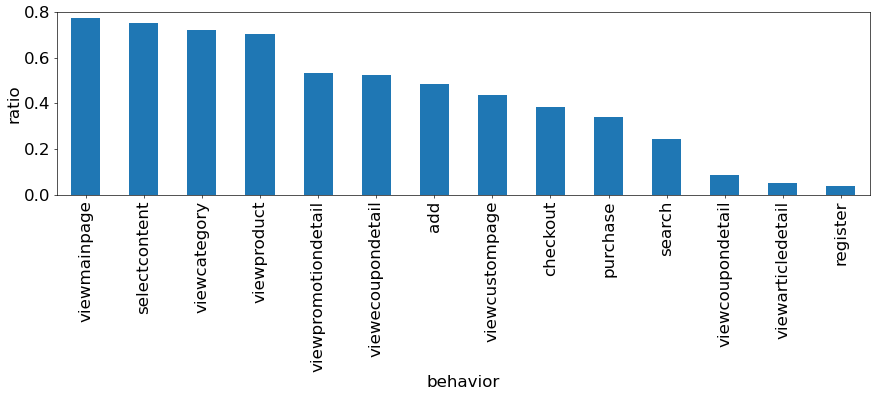

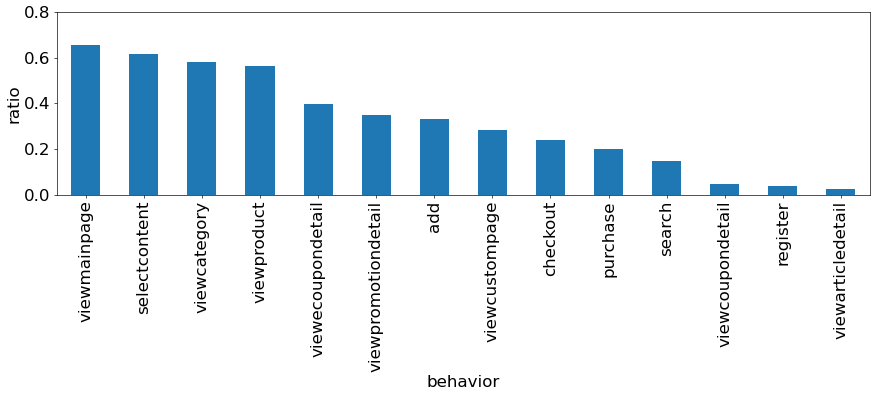

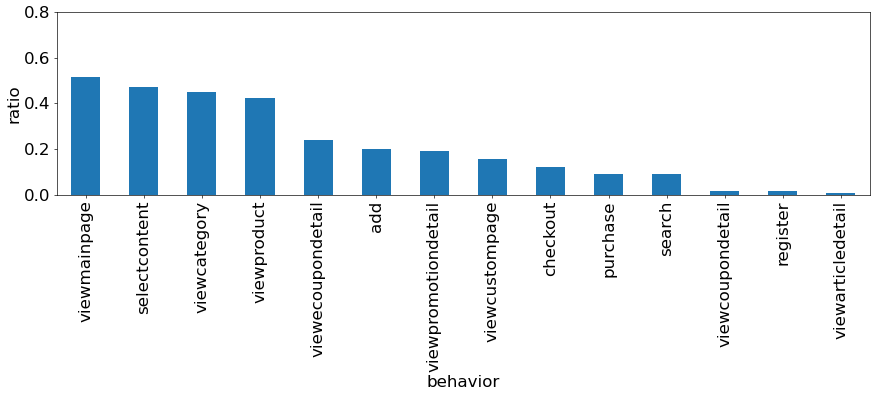

In [43]:
tags = ['AA', 'AP', 'AL']

for tag in tags:
    df_gp = []
    for b in behaviors:
        df_gp.append([b, sum(globals()[f"df_{tag}"][b]) / globals()[f"df_{tag}"].shape[0]])
    df_gp = pd.DataFrame(df_gp, columns=['behavior', 'ratio'])
    df_gp.sort_values(by=['ratio'], inplace=True, ascending=False)
    display(df_gp)
    field = "behavior"
    ax = df_gp.set_index(field).plot(kind="bar", legend=False)
    ax.set_ylabel("ratio")
    ax.set_ylim([0, 0.8])

In [20]:
df_tag_behavior

,ShopMemberId,tag,viewproduct,selectcontent,viewcategory,viewmainpage,add,viewpromotiondetail,viewecoupondetail,checkout,search,viewcustompage,register,purchase,viewcoupondetail,viewarticledetail
0,+1M+FFZHS9pJCA2w8BWC2rx61bJJXUNt4ZnpUz5BH/0=,AA,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,+264TCZ+nRcIcGI25eFdqkoxeWJLctuzBrpvBqY7bPo=,AP,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,+458PoYquuxvkXIfUgKUPg3REaA4dLoBrHqeM10djm8=,AA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,+458PoYquuxvkXIfUgKUPg7HG5qv58R7Yi1lE1Xgbcw=,AL,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,+458PoYquuxvkXIfUgKUPghuUkC70xOWoFPhzGoFo+o=,AP,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,zr/JPzIrZ8jl1IxfFVxJcychexUWHiKCNoqAlCcpehQ=,AP,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19598,zr/JPzIrZ8jl1IxfFVxJcz/eEjQlsmiOKRH9bVHHBlQ=,AP,1,1,1,1,0,0,0,0,0,0,0,0,0,0
19599,zr/JPzIrZ8jl1IxfFVxJczLhx0hK1xiUCbnrNq+6nKc=,AA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19600,zr/JPzIrZ8jl1IxfFVxJczkkOo3YSFAPuBabMOTJQ/Q=,AP,1,1,1,1,0,1,0,0,0,0,0,0,0,0


## 每個行為與四群的卡方檢定

$H_0$: The two variables are independent.  
$H_1$: The two variables are dependent.

In [21]:
for b in behaviors:
    print(f'======================= {b} =======================')
    # 列出Contingency Table
    cont1 = pd.crosstab(df_tag_behavior[b], df_tag_behavior['tag'])
    print("Contingency Table:")
    display(cont1)
    
    chi2, p, dof, ex = stats.chi2_contingency(cont1, correction=False)
    print("Chi-squared Statistics = %0.4f" % chi2)
    print("Degree of freedom = %0.4f" % dof)
    print("p-value = %0.4f" % p)
    print("Expected Frequency:")
    print(ex)

    if np.sum(ex < 5) > 0:
        print("Rule of five is not met. ")
    else:
        print("Rule of five is met. ")
    print('\n\n')
    
    if p < alpha:
        filtered_behaviors_by_member.append(b)

======================= viewproduct =======================
Contingency Table:


tag,AA,AL,AP
viewproduct,,,
0,1442,1446,5366
1,3408,1054,6886


Chi-squared Statistics = 572.8910
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2042.23548617 1052.69870421 5159.06580961]
 [2807.76451383 1447.30129579 7092.93419039]]
Rule of five is met. 



======================= selectcontent =======================
Contingency Table:


tag,AA,AL,AP
selectcontent,,,
0,1205,1322,4730
1,3645,1178,7522


Chi-squared Statistics = 591.2516
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[1795.5540251   925.54331191 4535.90266299]
 [3054.4459749  1574.45668809 7716.09733701]]
Rule of five is met. 



======================= viewcategory =======================
Contingency Table:


tag,AA,AL,AP
viewcategory,,,
0,1352,1380,5142
1,3498,1120,7110


Chi-squared Statistics = 556.4696
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[1948.21446791 1004.23426181 4921.55127028]
 [2901.78553209 1495.76573819 7330.44872972]]
Rule of five is met. 



======================= viewmainpage =======================
Contingency Table:


tag,AA,AL,AP
viewmainpage,,,
0,1104,1214,4206
1,3746,1286,8046


Chi-squared Statistics = 510.5280
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[1614.19242934  832.05795327 4077.74961739]
 [3235.80757066 1667.94204673 8174.25038261]]
Rule of five is met. 



======================= add =======================
Contingency Table:


tag,AA,AL,AP
add,,,
0,2510,2003,8189
1,2340,497,4063


Chi-squared Statistics = 641.5189
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[3142.77624732 1619.98775635 7939.23599633]
 [1707.22375268  880.01224365 4312.76400367]]
Rule of five is met. 



======================= viewpromotiondetail =======================
Contingency Table:


tag,AA,AL,AP
viewpromotiondetail,,,
0,2275,2022,8002
1,2575,478,4250


Chi-squared Statistics = 906.6853
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[3043.06448322 1568.5899398  7687.34557698]
 [1806.93551678  931.4100602  4564.65442302]]
Rule of five is met. 



======================= viewecoupondetail =======================
Contingency Table:


tag,AA,AL,AP
viewecoupondetail,,,
0,2301,1906,7414
1,2549,594,4838


Chi-squared Statistics = 587.1416
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[2875.31119274 1482.11917151 7263.56963575]
 [1974.68880726 1017.88082849 4988.43036425]]
Rule of five is met. 



======================= checkout =======================
Contingency Table:


tag,AA,AL,AP
checkout,,,
0,2997,2200,9342
1,1853,300,2910


Chi-squared Statistics = 665.0048
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[3597.29364351 1854.27507397 9087.43128252]
 [1252.70635649  645.72492603 3164.56871748]]
Rule of five is met. 



======================= search =======================
Contingency Table:


tag,AA,AL,AP
search,,,
0,3673,2279,10432
1,1177,221,1820


Chi-squared Statistics = 344.2594
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[ 4053.79042955  2089.58269564 10240.62687481]
 [  796.20957045   410.41730436  2011.37312519]]
Rule of five is met. 



======================= viewcustompage =======================
Contingency Table:


tag,AA,AL,AP
viewcustompage,,,
0,2731,2108,8800
1,2119,392,3452


Chi-squared Statistics = 689.3306
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[3374.61228446 1739.49086828 8524.89684726]
 [1475.38771554  760.50913172 3727.10315274]]
Rule of five is met. 



======================= register =======================
Contingency Table:


tag,AA,AL,AP
register,,,
0,4664,2462,11818
1,186,38,434


Chi-squared Statistics = 30.7183
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[ 4687.19518416  2416.07999184 11840.724824  ]
 [  162.80481584    83.92000816   411.275176  ]]
Rule of five is met. 



======================= purchase =======================
Contingency Table:


tag,AA,AL,AP
purchase,,,
0,3203,2270,9779
1,1647,230,2473


Chi-squared Statistics = 661.8855
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[3773.70676462 1945.20967248 9533.0835629 ]
 [1076.29323538  554.79032752 2718.9164371 ]]
Rule of five is met. 



======================= viewcoupondetail =======================
Contingency Table:


tag,AA,AL,AP
viewcoupondetail,,,
0,4437,2461,11684
1,413,39,568


Chi-squared Statistics = 183.1300
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[ 4597.62779308  2369.91123355 11614.46097337]
 [  252.37220692   130.08876645   637.53902663]]
Rule of five is met. 



======================= viewarticledetail =======================
Contingency Table:


tag,AA,AL,AP
viewarticledetail,,,
0,4608,2478,11965
1,242,22,287


Chi-squared Statistics = 128.2352
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[ 4713.66952352  2429.72655851 11907.60391797]
 [  136.33047648    70.27344149   344.39608203]]
Rule of five is met. 





In [22]:
behaviors

['viewproduct',
 'selectcontent',
 'viewcategory',
 'viewmainpage',
 'add',
 'viewpromotiondetail',
 'viewecoupondetail',
 'checkout',
 'search',
 'viewcustompage',
 'register',
 'purchase',
 'viewcoupondetail',
 'viewarticledetail']

In [23]:
filtered_behaviors_by_member

['viewproduct',
 'selectcontent',
 'viewcategory',
 'viewmainpage',
 'add',
 'viewpromotiondetail',
 'viewecoupondetail',
 'checkout',
 'search',
 'viewcustompage',
 'register',
 'purchase',
 'viewcoupondetail',
 'viewarticledetail']

In [24]:
filtered_behaviors_by_total_actions

['viewproduct',
 'selectcontent',
 'viewcategory',
 'viewmainpage',
 'add',
 'viewpromotiondetail',
 'viewecoupondetail',
 'checkout',
 'search',
 'viewcustompage',
 'register',
 'purchase',
 'viewcoupondetail']

In [25]:
df_filter_behaviors = df_filter_member[df_filter_member.Behavior.isin(filtered_behaviors_by_total_actions)]

In [26]:
df_filter_behaviors

,ShopMemberId,Behavior,Tunnel,Device,PageType,UnitPrice,Qty,TotalSalesAmount,UTMSource,HitTime,...,add,viewpromotiondetail,viewecoupondetail,checkout,search,viewcustompage,register,purchase,viewcoupondetail,viewarticledetail
0,jwWVWrbFBUjl0MCzqvGhtD4gkN7YyxldUUZhtvVDh3Q=,add,Web,Desktop,NaN,1440.0,NaN,NaN,hiddenlink,1.648524e+12,...,1,0,0,0,0,0,0,0,0,0
1,COeFF6e5xHPkK7aJ/81ZrMhsMCiLh0CI/qpVD2SJDmE=,add,Web,Desktop,NaN,3600.0,NaN,NaN,(direct),1.648611e+12,...,1,0,0,0,0,0,0,0,0,0
2,gIsgcic0IW0Iy5wA9qTRBTUgJPXCG98R9MkEkAhdb5I=,add,Web,MobileWeb,NaN,1700.0,1.0,NaN,affiliate,1.647772e+12,...,1,0,0,0,0,0,0,0,0,0
3,pDIP9rsN887S03R/ZAMNQWKYnKMxn/FU0FwE+0XNsqk=,add,Web,MobileWeb,NaN,4000.0,NaN,NaN,FB_CA,1.647219e+12,...,1,0,0,0,0,0,0,0,0,0
4,yRX+te+f7ZR6EDZHYbG7b1CDPvd1aOTwhafCjdsKEU0=,add,Web,MobileWeb,NaN,550.0,NaN,NaN,FB_CA,1.647213e+12,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482785,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661261e+12,...,0,1,0,0,0,0,0,0,0,0
4482786,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,FB_CA,1.661255e+12,...,0,1,0,0,0,0,0,0,0,0
4482787,pehSI78K0X7CIGKGIkULBKuDnVPlML+OEjcrQN70t/I=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661773e+12,...,0,1,0,0,0,0,0,0,0,0
4482788,CMUcNcCnQR0Ef1sblo72oQHyd3GQHVvwgYuIR8O8AVE=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,(direct),1.661440e+12,...,0,1,0,0,0,0,0,0,0,0


In [27]:
# df_filter_behaviors.to_csv('./behavior_after_filter_new.csv', index=False) 

# Stage 2: 篩選欄位

In [28]:
# df_filter_behaviors = pd.read_csv('./behavior_after_filter_new.csv')

In [29]:
df_filter_behaviors

,ShopMemberId,Behavior,Tunnel,Device,PageType,UnitPrice,Qty,TotalSalesAmount,UTMSource,HitTime,...,add,viewpromotiondetail,viewecoupondetail,checkout,search,viewcustompage,register,purchase,viewcoupondetail,viewarticledetail
0,jwWVWrbFBUjl0MCzqvGhtD4gkN7YyxldUUZhtvVDh3Q=,add,Web,Desktop,NaN,1440.0,NaN,NaN,hiddenlink,1.648524e+12,...,1,0,0,0,0,0,0,0,0,0
1,COeFF6e5xHPkK7aJ/81ZrMhsMCiLh0CI/qpVD2SJDmE=,add,Web,Desktop,NaN,3600.0,NaN,NaN,(direct),1.648611e+12,...,1,0,0,0,0,0,0,0,0,0
2,gIsgcic0IW0Iy5wA9qTRBTUgJPXCG98R9MkEkAhdb5I=,add,Web,MobileWeb,NaN,1700.0,1.0,NaN,affiliate,1.647772e+12,...,1,0,0,0,0,0,0,0,0,0
3,pDIP9rsN887S03R/ZAMNQWKYnKMxn/FU0FwE+0XNsqk=,add,Web,MobileWeb,NaN,4000.0,NaN,NaN,FB_CA,1.647219e+12,...,1,0,0,0,0,0,0,0,0,0
4,yRX+te+f7ZR6EDZHYbG7b1CDPvd1aOTwhafCjdsKEU0=,add,Web,MobileWeb,NaN,550.0,NaN,NaN,FB_CA,1.647213e+12,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482785,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661261e+12,...,0,1,0,0,0,0,0,0,0,0
4482786,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,FB_CA,1.661255e+12,...,0,1,0,0,0,0,0,0,0,0
4482787,pehSI78K0X7CIGKGIkULBKuDnVPlML+OEjcrQN70t/I=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661773e+12,...,0,1,0,0,0,0,0,0,0,0
4482788,CMUcNcCnQR0Ef1sblo72oQHyd3GQHVvwgYuIR8O8AVE=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,(direct),1.661440e+12,...,0,1,0,0,0,0,0,0,0,0


In [30]:
df_filter_behaviors.columns

Index(['ShopMemberId', 'Behavior', 'Tunnel', 'Device', 'PageType', 'UnitPrice',
       'Qty', 'TotalSalesAmount', 'UTMSource', 'HitTime', 'EventTime', 'tag',
       'viewproduct', 'selectcontent', 'viewcategory', 'viewmainpage', 'add',
       'viewpromotiondetail', 'viewecoupondetail', 'checkout', 'search',
       'viewcustompage', 'register', 'purchase', 'viewcoupondetail',
       'viewarticledetail'],
      dtype='object')

# Tunnel, Device, PageType, UTMSource_class 與四群的卡方檢定

$H_0$: The two variables are independent.  
$H_1$: The two variables are dependent.

In [31]:
def UTMSource_classification(row):
    if row == '(direct)':
        return 1
    elif row == 'FB_CA':
        return 2
    elif row == 'TP':
        return 3
    elif row == 'LINEOA':
        return 4
    elif row == 'System_Inform':
        return 5
    else: return 0

In [32]:
df_filter_behaviors['UTMSource_Class'] = df_filter_behaviors['UTMSource'].apply(UTMSource_classification)
display(df_filter_behaviors)

/var/folders/5x/6ks7vxxd07q125cs_yvz4_sc0000gn/T/ipykernel_43810/845853485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_behaviors['UTMSource_Class'] = df_filter_behaviors['UTMSource'].apply(UTMSource_classification)


,ShopMemberId,Behavior,Tunnel,Device,PageType,UnitPrice,Qty,TotalSalesAmount,UTMSource,HitTime,...,viewpromotiondetail,viewecoupondetail,checkout,search,viewcustompage,register,purchase,viewcoupondetail,viewarticledetail,UTMSource_Class
0,jwWVWrbFBUjl0MCzqvGhtD4gkN7YyxldUUZhtvVDh3Q=,add,Web,Desktop,NaN,1440.0,NaN,NaN,hiddenlink,1.648524e+12,...,0,0,0,0,0,0,0,0,0,0
1,COeFF6e5xHPkK7aJ/81ZrMhsMCiLh0CI/qpVD2SJDmE=,add,Web,Desktop,NaN,3600.0,NaN,NaN,(direct),1.648611e+12,...,0,0,0,0,0,0,0,0,0,1
2,gIsgcic0IW0Iy5wA9qTRBTUgJPXCG98R9MkEkAhdb5I=,add,Web,MobileWeb,NaN,1700.0,1.0,NaN,affiliate,1.647772e+12,...,0,0,0,0,0,0,0,0,0,0
3,pDIP9rsN887S03R/ZAMNQWKYnKMxn/FU0FwE+0XNsqk=,add,Web,MobileWeb,NaN,4000.0,NaN,NaN,FB_CA,1.647219e+12,...,0,0,0,0,0,0,0,0,0,2
4,yRX+te+f7ZR6EDZHYbG7b1CDPvd1aOTwhafCjdsKEU0=,add,Web,MobileWeb,NaN,550.0,NaN,NaN,FB_CA,1.647213e+12,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482785,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661261e+12,...,1,0,0,0,0,0,0,0,0,3
4482786,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,FB_CA,1.661255e+12,...,1,0,0,0,0,0,0,0,0,2
4482787,pehSI78K0X7CIGKGIkULBKuDnVPlML+OEjcrQN70t/I=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661773e+12,...,1,0,0,0,0,0,0,0,0,3
4482788,CMUcNcCnQR0Ef1sblo72oQHyd3GQHVvwgYuIR8O8AVE=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,(direct),1.661440e+12,...,1,0,0,0,0,0,0,0,0,1


In [33]:
columns = ['Tunnel', 'Device', 'PageType', 'UTMSource_Class']
alpha = 0.05
filtered_columns = list(df_filter_behaviors.columns)

In [34]:
for c in columns:
    print(f'======================= {c} =======================')
    # 列出Contingency Table
    cont1 = pd.crosstab(df_filter_behaviors[c], df_filter_behaviors['tag'])
    print("Contingency Table:")
    display(cont1)
    
    chi2, p, dof, ex = stats.chi2_contingency(cont1, correction=False)
    print("Chi-squared Statistics = %0.4f" % chi2)
    print("Degree of freedom = %0.4f" % dof)
    print("p-value = %0.4f" % p)
    print("Expected Frequency:")
    print(ex)

    if np.sum(ex < 5) > 0:
        print("Rule of five is not met. ")
    else:
        print("Rule of five is met. ")
    print('\n\n')
    
    if p > alpha:
        filtered_columns.remove(b)

======================= Tunnel =======================
Contingency Table:


tag,AA,AL,AP
Tunnel,,,
App,1989393,163438,2082526
Web,109451,7190,129919


Chi-squared Statistics = 1460.8158
Degree of freedom = 2.0000
p-value = 0.0000
Expected Frequency:
[[1983382.02766986  161241.38269316 2090733.58963698]
 [ 115461.97233014    9386.61730684  121711.41036302]]
Rule of five is met. 



======================= Device =======================
Contingency Table:


tag,AA,AL,AP
Device,,,
Android APP,579517,31017,597945
Desktop,45436,2279,39729
MobileWeb,64015,4911,90190
iOS APP,1409876,132421,1484581


Chi-squared Statistics = 12398.3410
Degree of freedom = 6.0000
p-value = 0.0000
Expected Frequency:
[[ 565920.5420975    46007.17835962  596551.27954288]
 [  40949.28905109    3329.02078106   43165.69016785]
 [  74512.68327905    6057.59652577   78545.72019518]
 [1417461.48557236  115234.20433355 1494182.3100941 ]]
Rule of five is met. 



======================= PageType =======================
Contingency Table:


tag,AA,AL,AP
PageType,,,
ArticleDetail,1,0,0
BackInStockAlertList,25,2,17
BrowsingHistory,1,0,0
CustomPage,13744,761,10355
ECouponDetail,47,3,35
ECouponECouponHistory,4,0,1
ECouponList,4,0,7
ECouponMyECoupon,18,4,12
HiddenPage,1158,211,2856


Chi-squared Statistics = 2120.8003
Degree of freedom = 68.0000
p-value = 0.0000
Expected Frequency:
[[4.77307947e-01 4.24572117e-02 4.80234841e-01]
 [2.10015497e+01 1.86811731e+00 2.11303330e+01]
 [4.77307947e-01 4.24572117e-02 4.80234841e-01]
 [1.18658756e+04 1.05548628e+03 1.19386382e+04]
 [4.05711755e+01 3.60886299e+00 4.08199615e+01]
 [2.38653973e+00 2.12286059e-01 2.40117421e+00]
 [5.25038742e+00 4.67029329e-01 5.28258325e+00]
 [1.62284702e+01 1.44354520e+00 1.63279846e+01]
 [2.01662608e+03 1.79381719e+02 2.02899220e+03]
 [2.14027747e+05 1.90380685e+04 2.15340184e+05]
 [3.34115563e+00 2.97200482e-01 3.36164389e+00]
 [1.43192384e+00 1.27371635e-01 1.44070452e+00]
 [3.77073278e+01 3.35411972e+00 3.79385525e+01]
 [9.54615894e-01 8.49144234e-02 9.60469683e-01]
 [4.77307947e+00 4.24572117e-01 4.80234841e+00]
 [4.29577152e+00 3.82114905e-01 4.32211357e+00]
 [7.15961920e+00 6.36858176e-01 7.20352262e+00]
 [2.86384768e+01 2.54743270e+00 2.88140905e+01]
 [1.43192384e+00 1.27371635e-01 1.44

tag,AA,AL,AP
UTMSource_Class,,,
0,180899,13918,210373
1,1701245,141231,1786843
2,125728,9394,136866
3,36043,679,16107
4,21171,1787,27562
5,33758,3619,34694


Chi-squared Statistics = 12046.8559
Degree of freedom = 10.0000
p-value = 0.0000
Expected Frequency:
[[ 189747.0659006    15425.71165865  200017.22244075]
 [1699579.53421181  138169.32404862 1791570.14173957]
 [ 127369.69066406   10354.66932208  134263.64001386]
 [  24739.3759581     2011.2167655    26078.4072764 ]
 [  23658.09069646    1923.31240404   24938.5968995 ]
 [  33750.24256897    2743.76580111   35576.99162992]]
Rule of five is met. 





In [35]:
filtered_columns

['ShopMemberId',
 'Behavior',
 'Tunnel',
 'Device',
 'PageType',
 'UnitPrice',
 'Qty',
 'TotalSalesAmount',
 'UTMSource',
 'HitTime',
 'EventTime',
 'tag',
 'viewproduct',
 'selectcontent',
 'viewcategory',
 'viewmainpage',
 'add',
 'viewpromotiondetail',
 'viewecoupondetail',
 'checkout',
 'search',
 'viewcustompage',
 'register',
 'purchase',
 'viewcoupondetail',
 'viewarticledetail',
 'UTMSource_Class']

# UnitPrice, Qty, TotalSalesAmount 的 Kruskal-Wallis Test

### Kruskal-Wallis Test

$H_0$: All population have same medium.  
$H_1$: At least one population have different medium.

In [36]:
cols = ['UnitPrice', 'Qty', 'TotalSalesAmount']

for c in cols:
    df_subset = df_filter_behaviors[['tag', c]]
    df_subset.dropna(inplace=True)

    data = {'AA': df_subset[c][df_subset['tag'] == 'AA'].reset_index(drop=True), 
            'AP': df_subset[c][df_subset['tag'] == 'AP'].reset_index(drop=True),
            'AL': df_subset[c][df_subset['tag'] == 'AL'].reset_index(drop=True)
           }

    df_kwtest = pd.DataFrame(data)
    display(df_kwtest)
    
    print(df_kwtest.median())

    # Kruskal-Wallis Test
    statistic, p_value = stats.kruskal(df_kwtest['AA'], df_kwtest['AP'].dropna(), df_kwtest['AL'].dropna())

    if p_value > alpha:
        # print('At least one population have different medium.')
        filtered_columns.remove(c)

    print("Kruskal-Wallis statistic:", statistic)
    print("p-value:", p_value)
    print('\n')

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,AA,AP,AL
0,1440.0,1700.0,1450.0
1,3600.0,4000.0,4500.0
2,550.0,1800.0,1700.0
3,1700.0,2520.0,1450.0
4,3900.0,888.0,4200.0
...,...,...,...
614266,3900.0,NaN,NaN
614267,1105.0,NaN,NaN
614268,990.0,NaN,NaN
614269,799.0,NaN,NaN


AA    1990.0
AP    2030.0
AL    2100.0
dtype: float64
Kruskal-Wallis statistic: 1160.222014313985
p-value: 1.1507757469288711e-252




/Users/amber/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,AA,AP,AL
0,1.0,1.0,1.0
1,1.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
...,...,...,...
611349,1.0,NaN,NaN
611350,1.0,NaN,NaN
611351,1.0,NaN,NaN
611352,1.0,NaN,NaN


AA    1.0
AP    1.0
AL    1.0
dtype: float64
Kruskal-Wallis statistic: 3.6705067818288106
p-value: 0.15957306228066928




/Users/amber/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,AA,AP,AL
0,4250.0,1600.0,2440.0
1,3450.0,4730.0,1490.0
2,840.0,2750.0,2440.0
3,7136.0,2940.0,2840.0
4,6140.0,1840.0,5500.0
...,...,...,...
8412,11195.0,NaN,NaN
8413,10250.0,NaN,NaN
8414,4650.0,NaN,NaN
8415,1330.0,NaN,NaN


AA    3430.0
AP    2990.0
AL    2990.0
dtype: float64
Kruskal-Wallis statistic: 97.23922352074175
p-value: 7.6695679619809e-22




In [37]:
df_filter_behaviors

,ShopMemberId,Behavior,Tunnel,Device,PageType,UnitPrice,Qty,TotalSalesAmount,UTMSource,HitTime,...,viewpromotiondetail,viewecoupondetail,checkout,search,viewcustompage,register,purchase,viewcoupondetail,viewarticledetail,UTMSource_Class
0,jwWVWrbFBUjl0MCzqvGhtD4gkN7YyxldUUZhtvVDh3Q=,add,Web,Desktop,NaN,1440.0,NaN,NaN,hiddenlink,1.648524e+12,...,0,0,0,0,0,0,0,0,0,0
1,COeFF6e5xHPkK7aJ/81ZrMhsMCiLh0CI/qpVD2SJDmE=,add,Web,Desktop,NaN,3600.0,NaN,NaN,(direct),1.648611e+12,...,0,0,0,0,0,0,0,0,0,1
2,gIsgcic0IW0Iy5wA9qTRBTUgJPXCG98R9MkEkAhdb5I=,add,Web,MobileWeb,NaN,1700.0,1.0,NaN,affiliate,1.647772e+12,...,0,0,0,0,0,0,0,0,0,0
3,pDIP9rsN887S03R/ZAMNQWKYnKMxn/FU0FwE+0XNsqk=,add,Web,MobileWeb,NaN,4000.0,NaN,NaN,FB_CA,1.647219e+12,...,0,0,0,0,0,0,0,0,0,2
4,yRX+te+f7ZR6EDZHYbG7b1CDPvd1aOTwhafCjdsKEU0=,add,Web,MobileWeb,NaN,550.0,NaN,NaN,FB_CA,1.647213e+12,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482785,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661261e+12,...,1,0,0,0,0,0,0,0,0,3
4482786,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,FB_CA,1.661255e+12,...,1,0,0,0,0,0,0,0,0,2
4482787,pehSI78K0X7CIGKGIkULBKuDnVPlML+OEjcrQN70t/I=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,TP,1.661773e+12,...,1,0,0,0,0,0,0,0,0,3
4482788,CMUcNcCnQR0Ef1sblo72oQHyd3GQHVvwgYuIR8O8AVE=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,NaN,(direct),1.661440e+12,...,1,0,0,0,0,0,0,0,0,1


In [38]:
df_filter_columns = df_filter_behaviors[filtered_columns]

In [39]:
df_filter_columns.drop(['viewarticledetail'], axis=1, inplace=True)

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
df_filter_columns

,ShopMemberId,Behavior,Tunnel,Device,PageType,UnitPrice,TotalSalesAmount,UTMSource,HitTime,EventTime,...,add,viewpromotiondetail,viewecoupondetail,checkout,search,viewcustompage,register,purchase,viewcoupondetail,UTMSource_Class
0,jwWVWrbFBUjl0MCzqvGhtD4gkN7YyxldUUZhtvVDh3Q=,add,Web,Desktop,NaN,1440.0,NaN,hiddenlink,1.648524e+12,1.648526e+12,...,1,0,0,0,0,0,0,0,0,0
1,COeFF6e5xHPkK7aJ/81ZrMhsMCiLh0CI/qpVD2SJDmE=,add,Web,Desktop,NaN,3600.0,NaN,(direct),1.648611e+12,1.648611e+12,...,1,0,0,0,0,0,0,0,0,1
2,gIsgcic0IW0Iy5wA9qTRBTUgJPXCG98R9MkEkAhdb5I=,add,Web,MobileWeb,NaN,1700.0,NaN,affiliate,1.647772e+12,1.647774e+12,...,1,0,0,0,0,0,0,0,0,0
3,pDIP9rsN887S03R/ZAMNQWKYnKMxn/FU0FwE+0XNsqk=,add,Web,MobileWeb,NaN,4000.0,NaN,FB_CA,1.647219e+12,1.647219e+12,...,1,0,0,0,0,0,0,0,0,2
4,yRX+te+f7ZR6EDZHYbG7b1CDPvd1aOTwhafCjdsKEU0=,add,Web,MobileWeb,NaN,550.0,NaN,FB_CA,1.647213e+12,1.647214e+12,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482785,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,TP,1.661261e+12,1.661262e+12,...,0,1,0,0,0,0,0,0,0,3
4482786,kScTwLwkyhTKRHF/6TZtUuxHJ0bKfmwj/jK6mBHjTo8=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,FB_CA,1.661255e+12,1.661256e+12,...,0,1,0,0,0,0,0,0,0,2
4482787,pehSI78K0X7CIGKGIkULBKuDnVPlML+OEjcrQN70t/I=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,TP,1.661773e+12,1.661773e+12,...,0,1,0,0,0,0,0,0,0,3
4482788,CMUcNcCnQR0Ef1sblo72oQHyd3GQHVvwgYuIR8O8AVE=,viewpromotiondetail,App,Android APP,NaN,NaN,NaN,(direct),1.661440e+12,1.661441e+12,...,0,1,0,0,0,0,0,0,0,1


In [41]:
# df_filter_columns.to_csv('./g2_after_filter.csv', index=False) 

In [42]:
filtered_columns

['ShopMemberId',
 'Behavior',
 'Tunnel',
 'Device',
 'PageType',
 'UnitPrice',
 'TotalSalesAmount',
 'UTMSource',
 'HitTime',
 'EventTime',
 'tag',
 'viewproduct',
 'selectcontent',
 'viewcategory',
 'viewmainpage',
 'add',
 'viewpromotiondetail',
 'viewecoupondetail',
 'checkout',
 'search',
 'viewcustompage',
 'register',
 'purchase',
 'viewcoupondetail',
 'viewarticledetail',
 'UTMSource_Class']